# Visualizing Earnings Based On College Majors

I will use pandas plotting functionality to explore data on earnings from various college majors using visualizations

I will work with a dataset on the job outcomes of students who graduated college between 2010 and 2012. The original data was released by American Community Survey, and FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Some columns of the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.


Using visualizations, I will explore questions from the dataset, such as:
- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots



In [2]:
import pandas as pd
import matplotlib
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]
recent_grads.head()
recent_grads.tail()
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [3]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

In [5]:
print(raw_data_count, cleaned_data_count)

173 172


one row was dropped due to missing values

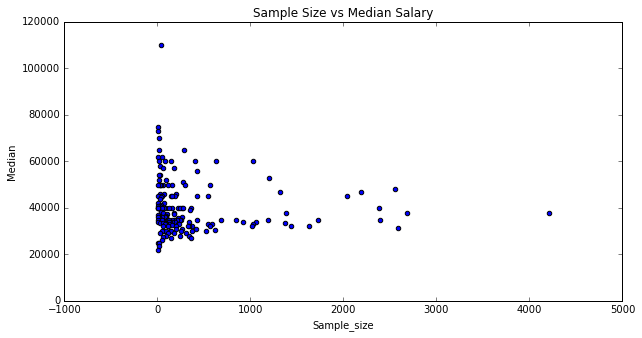

In [22]:
sample_size_vs_median = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs Median Salary', figsize=(10,5))

A larger sample size correlates to a more popular major.

The smaller sample sizes have a larger median salary, so it seems that more popular majors have a lower median salary. Smaller sample sizes were all over the board though, and many of them had equal or lower salary than popular majors.

Many of the majors with a lower popularity, but not the lowest, have a pretty large salary.

In summary, some less popular majors have a higher median salary than more popular majors, and some have equal or even less. If you were to choose a major based solely on its popularity and median salary, the best choice would be one who's popularity is on the lower end, but not extremely low, as this offers a larger percentage of higher median salaries.

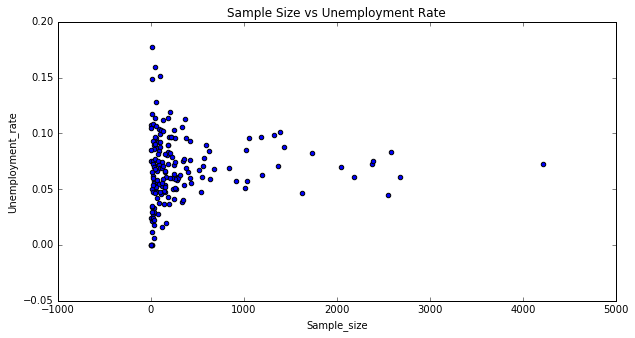

In [15]:
sample_size_unemployment_rate = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs Unemployment Rate', figsize=(10,5))

In comparing sample size (popularity of major) with their unemployment rates, it seems that some less popular majors have a very low unemployment rate and others have a very high unemployment rate. As the popularity of the major increases, the unemployment rate steadies to close to the national average.

This is in part due to the fact that some less popular majors do not have many job opportunities while other industries have more demand than supply. As popularity in the major increases, the supply increases and meets/exceeds the demand, in which case you would expect the unemployment rate to approach the national average.

It is also in part due to the fact that with a smaller sample size, you do not get the same spread of data as with larger sample sizes - the more data you have the more is will approach the average, so if you do not have much data to work with there is a good change that the median will be well above or below the average

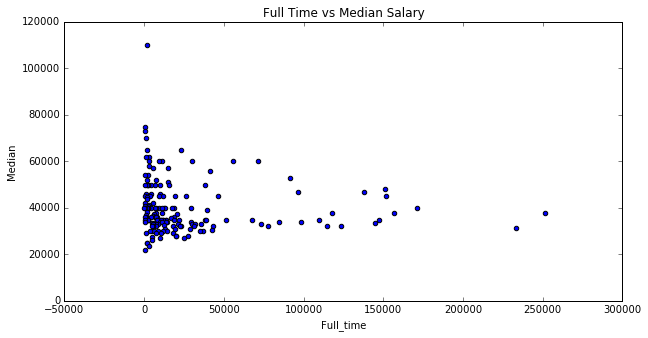

In [23]:
full_time_median = recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs Median Salary', figsize=((10,5)))

As the amount of people in a major who work full time increases, the spread of median salary decreases. 

This plot correlates well with the sample size vs median salary, which makes sense because a larger sample size will have more people working full time.

In order to get a more meaningful plot for this, it will be useful to use full time / sample size, so that the size of the sample does not affect the results.

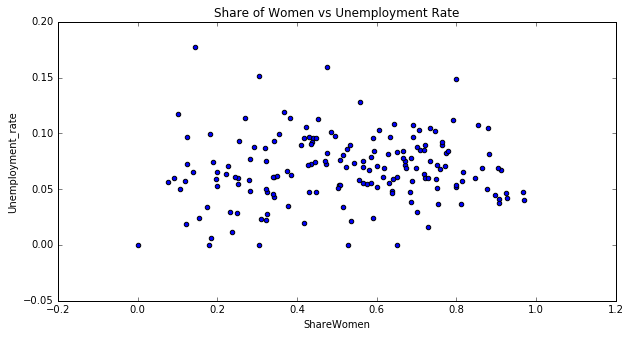

In [18]:
share_women_unemployment_rate = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of Women vs Unemployment Rate', figsize=(10,5))

The share of women in a major and that major's unemployment rate do not seem to have much correlation. 

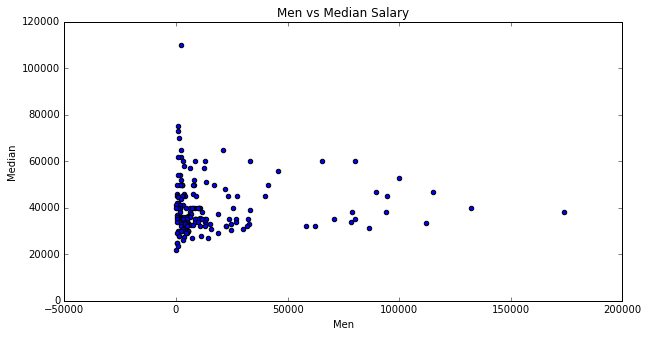

In [24]:
men_median = recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs Median Salary', figsize=(10,5))

The spread of men in a major vs that major's median salary decreases as the number of men increases. This also follows the sample size vs. median salary plot, so it will be useful to use men / sample size instead in order to get more useful data.

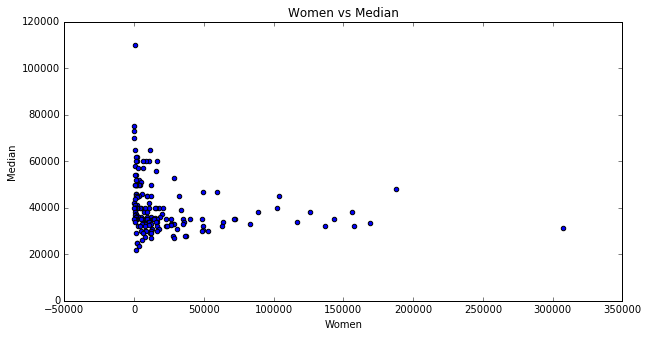

In [20]:
women_median = recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs Median', figsize=(10,5))

The spread of women in a major vs. that major's median salary also decreases as the number of women increases, but it is less spread out than that of men. In the middle quartile of men, the median salary was more spread out than that of women, who have lower median salaries on average. This also follows the sample size vs. median salary plot, so it will be useful to use women / sample size instead in order to get more useful data.

I will now generate histograms to explore the distributions of various columns

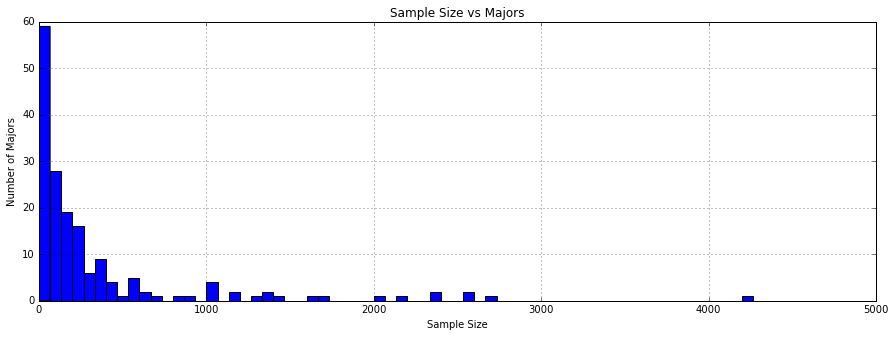

In [101]:
sample_size_hist = recent_grads['Sample_size'].hist(bins=75, range=(0,5000), figsize=(15,5))
sample_size_hist.set_title('Sample Size vs Majors')
sample_size_hist.set_xlabel('Sample Size')
sample_size_hist.set_ylabel('Number of Majors')

There are very few majors that are very popular, and many majors that are less popular

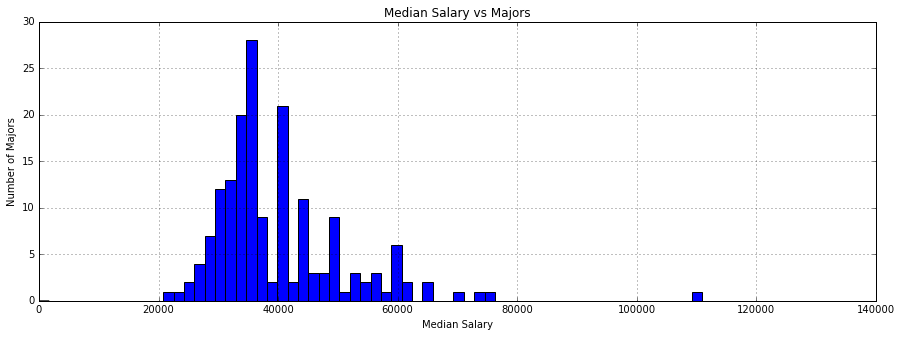

In [102]:
median_hist = recent_grads['Median'].hist(bins=75, range=(0,130000), figsize=(15,5))
median_hist.set_title('Median Salary vs Majors')
median_hist.set_xlabel('Median Salary')
median_hist.set_ylabel('Number of Majors')

The most common salary over all majors is ~$35,000. Very few majors have a median salary over 100,000

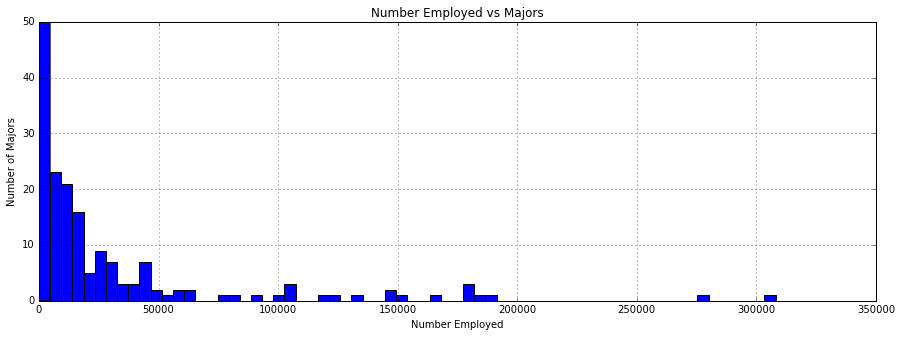

In [103]:
employed_hist = recent_grads['Employed'].hist(bins=75, range=(0,350000), figsize=(15,5))
employed_hist.set_title('Number Employed vs Majors')
employed_hist.set_xlabel('Number Employed')
employed_hist.set_ylabel('Number of Majors')

The most majors have less people employed, corresponding to the fact that there are many more less popular majors than there are more popular majors. 

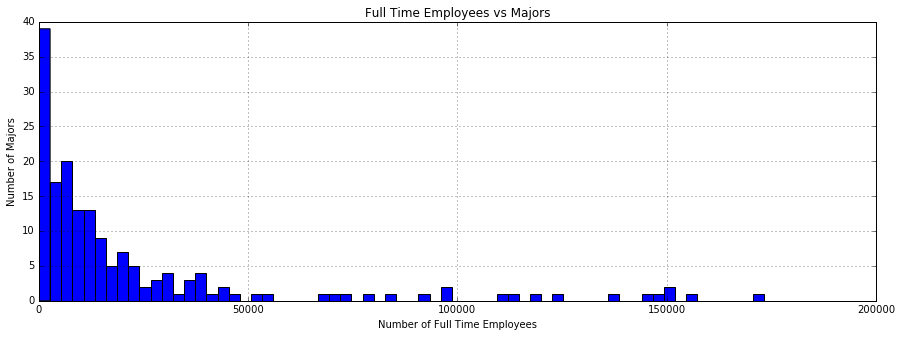

In [104]:
fulll_time_hist = recent_grads['Full_time'].hist(bins=75, range=(0,200000), figsize=(15,5))
fulll_time_hist.set_title('Full Time Employees vs Majors')
fulll_time_hist.set_xlabel('Number of Full Time Employees')
fulll_time_hist.set_ylabel('Number of Majors')

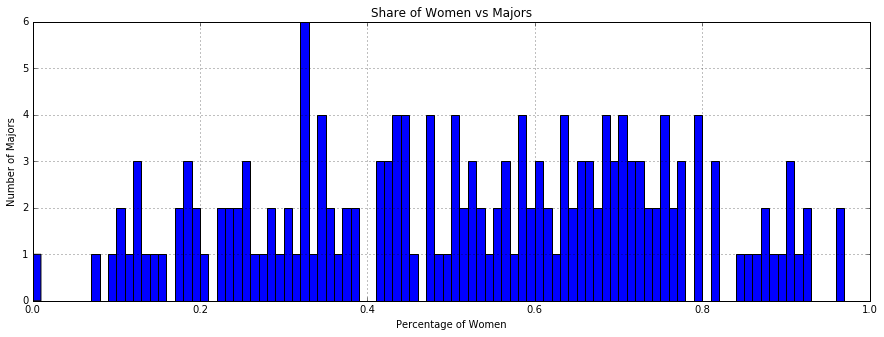

In [105]:
share_women_hist = recent_grads['ShareWomen'].hist(bins=100, range=(0,1), figsize=(15,5))
share_women_hist.set_title('Share of Women vs Majors')
share_women_hist.set_xlabel('Percentage of Women')
share_women_hist.set_ylabel('Number of Majors')

As the percentage of women in a major increases, the number of majors with this percentage stays relatively steady. The most common share of women is around 35%, however at percentages of women greater than this the number of majors is relatively steady.

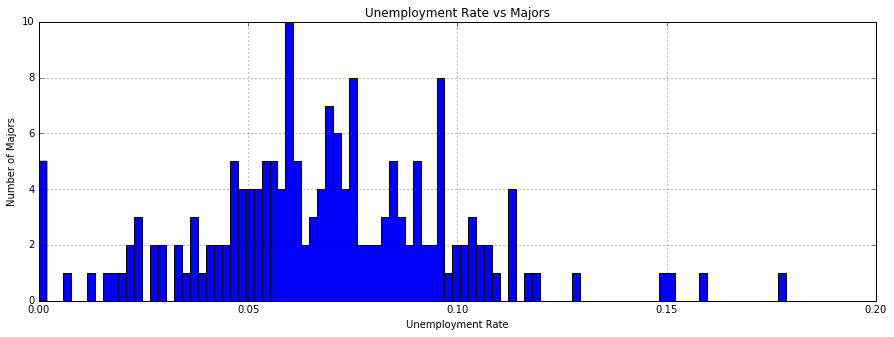

In [109]:
unemployment_rate_hist = recent_grads['Unemployment_rate'].hist(bins=100, range=(0,0.19), figsize=(15,5))
unemployment_rate_hist.set_title('Unemployment Rate vs Majors')
unemployment_rate_hist.set_xlabel('Unemployment Rate')
unemployment_rate_hist.set_ylabel('Number of Majors')

The most common unemployment rage is appeox. 6.5%, and the second most common are around 7% and 9%. Very few majors have a high unemployment rate.

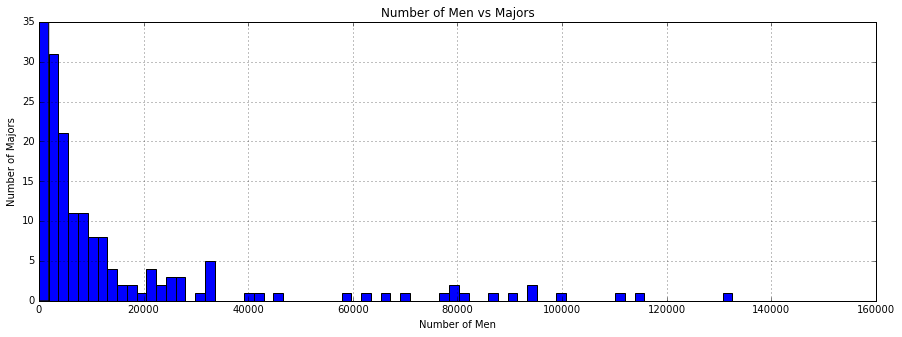

In [115]:
men_hist = recent_grads['Men'].hist(bins=75, range=(0,140000), figsize=(15,5))
men_hist.set_title('Number of Men vs Majors')
men_hist.set_xlabel('Number of Men')
men_hist.set_ylabel('Number of Majors')

More majors have a lower number of men, corresponding to the fact that there are more majors with a smaller sample size than with a large sample size.

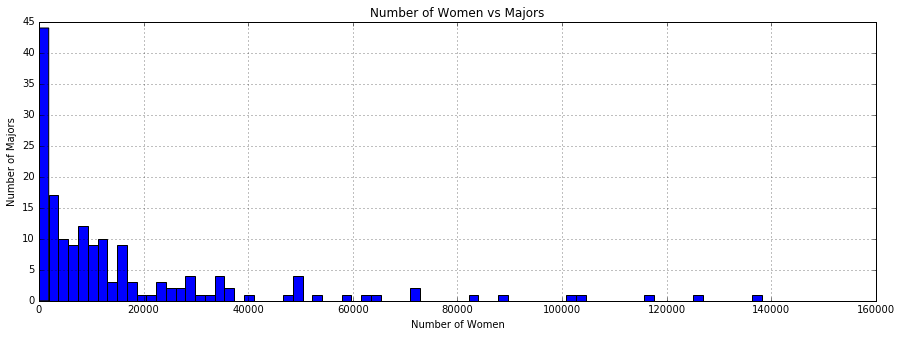

In [116]:
women_hist = recent_grads['Women'].hist(bins=75, range=(0,140000), figsize=(15,5))
women_hist.set_title('Number of Women vs Majors')
women_hist.set_xlabel('Number of Women')
women_hist.set_ylabel('Number of Majors')

More majors have a lower number of women, corresponding to the fact that there are more majors with a smaller sample size than with a large sample size.

I will now use scatter matrix plots to examine the relationships between sample size and median salary, and between sample size, median salary, and unemployment rate.

In [117]:
from pandas.plotting import scatter_matrix

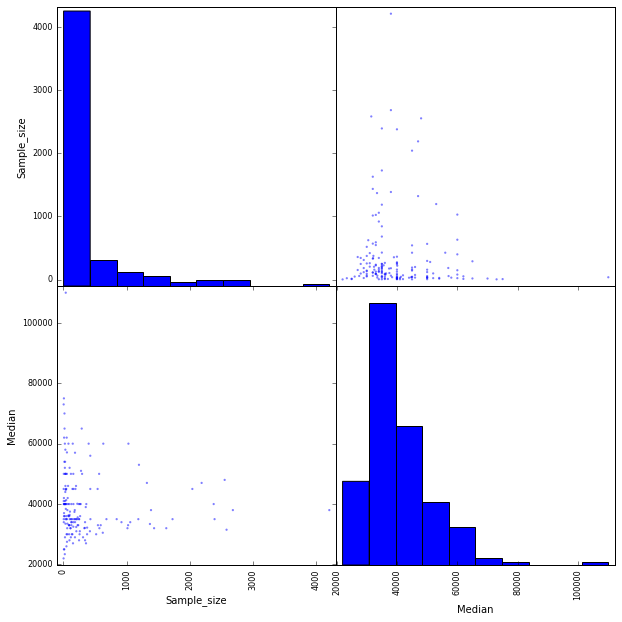

In [123]:
sample_size_median_sm = scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))

From comparing sample size and median salary, more popular majors have salaries that are closer to the average, while less popular majors have salaries that are more spread out, with many closer to the average, others that are less than average, and even some that are much greater than average. The more popular majors have more supply, so the demand for them is lower, and thus an average salary is more likely. For the less popular majors, some majors are less popular because there isn't a large demand for those jobs and they thus will have low salaries. Other less popular majors are very difficult and only people of high intelligence will be able to complete it; these are the majors that pay more than average.

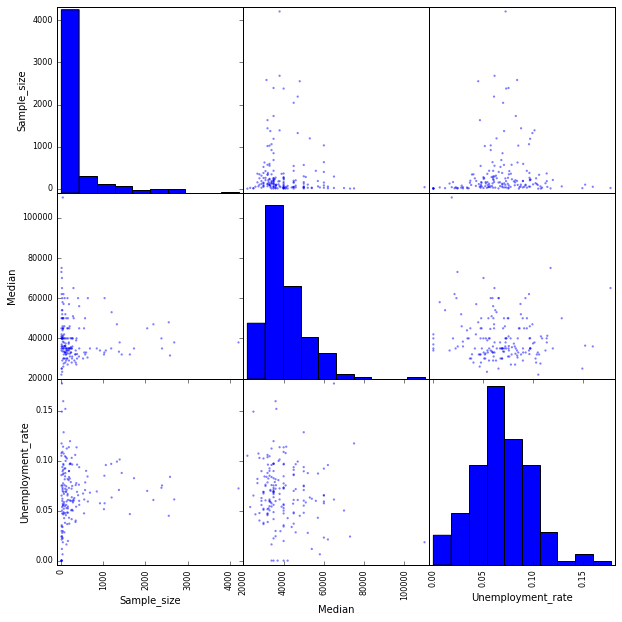

In [125]:
sample_size_median_unemployment_sm = scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

Sample size vs. Unemployment rate: The most popular majors have an average unemployment rate. The less popular majors have an unemployment rate that is more spread out, some with very low unemployment and some with very high unemployment.

Median salary vs. Unemployment rate: There does not seem to be much correlation between median salary and unemployment rate. 

I will use bar plots to compare both the percentages of women and the unemployment rate for the first and last ten rows of the dataset.

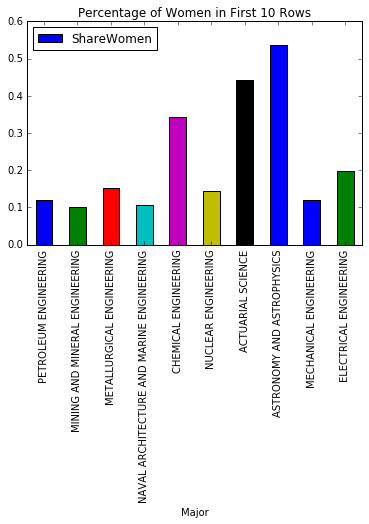

In [132]:
women_first_ten = recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
women_first_ten.set_title('Percentage of Women in First 10 Rows')

In the first 10 rows, Astronomy and Astrophysics has the largest share of women, followed by Actuarial Science and Chemical Engineering. 

The lowest shares of women are Mining and Mineral Engineering, Naval Architecture and Marine Engineering, Petroleum Engineering, and Mechanical Engineering.

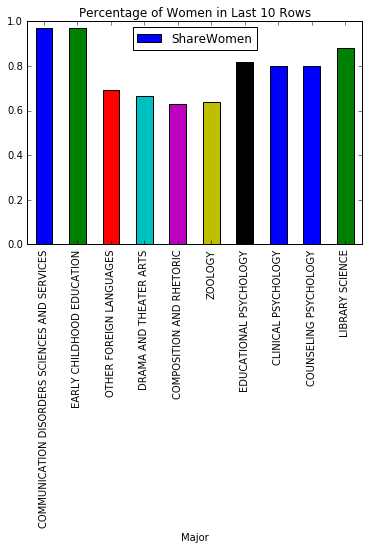

In [134]:
women_last_ten = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')
women_last_ten.set_title('Percentage of Women in Last 10 Rows')

The last 10 rows have a much higher percentage of women than the first 10 rows, all above 60%.
Communication Disorderrs Sciences and Services and Early Childhood Education both have close to 100% women.

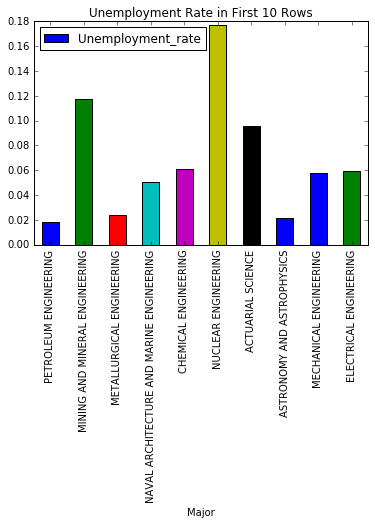

In [135]:
unemployment_first_ten = recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate")
unemployment_first_ten.set_title('Unemployment Rate in First 10 Rows')

In the first 10 rows, Nuclear Engineering has the highest unemployment rate at close to 18%, followed by Mining and Mineral Engineering at 12% and Actuarial Sciences at 10%. Petroleum Engineering has the lowest unemployment rate at 2%, followed by Astronomy and Astrophysics and Metallurgical Engineering, both at ~2.5%

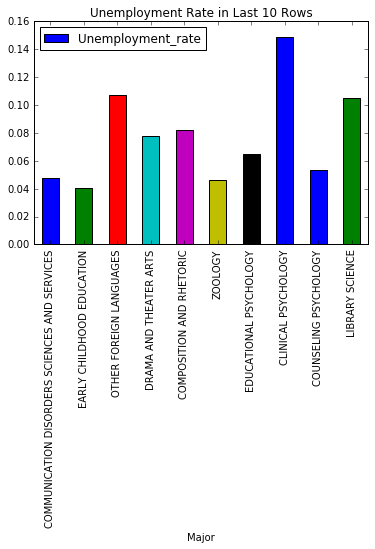

In [136]:
unemployment_last_ten = recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate")
unemployment_last_ten.set_title('Unemployment Rate in Last 10 Rows')

In the last 10 rows, Clinical Psychology has the highest unemployment rate at 15%, followed by Other Foreign Languages and Library Science at 10%. Early Childhood Education has the lowest unemployment rate at 4%, followed by Communication Disorders Sciences and Services and Composition and Rhetoric at 5%.